# COGS 181 Final Project LBP on linear SVM

### Yushan Wang A14459085
### Jiemin Tang A13948547

### Import package

In [1]:
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from random import shuffle
from random import randint
from sklearn.svm import LinearSVC

# It should print "Using TensorFlow backend"

Using TensorFlow backend.


### Helper function

In [2]:
def imshow(inp, title=None):
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.figure(figsize=(20,20))
    plt.imshow(inp)

    if title is not None:
        plt.title(title)
    plt.pause(0.001)

In [3]:
'''
This is the file for the local Binary Pattern
'''

from skimage import feature
import numpy as np
import random 
import os

class LocalBinaryPatterns:
    # init_function
    def __init__(self, numPoints, radius, center):
        # store the center of the LBP
        # store the number of points and radius
        self.numPoints = numPoints
        self.radius = radius
        self.center = center

    # do the LBP transformation and transform to histogram
    def histogram(self, image, eps=1e-7):
        lbp = feature.local_binary_pattern(image, self.numPoints,self.radius, method="uniform")
        hist, _ = np.histogram(lbp.ravel(),	bins=np.arange(0, self.numPoints + 3),range=(0, self.numPoints + 2))
        hist = hist.astype("float")
        hist /= (hist.sum() + eps)
        # return the histogram of Local Binary Patterns
        return hist

### Initialize path directories for dataset

In [4]:
# paths for thw two dataset folders
mask = r'dataset/with_mask'
no_mask = r'dataset/without_mask'

### Load and Store images

In [5]:
# store images from the dataset
images = []
labels = []
for file in list(os.listdir(mask)):
    images.append(cv2.imread(mask+'/'+file))
    labels.append(1)
    
for file in list(os.listdir(no_mask)):
    images.append(cv2.imread(no_mask+'/'+file)) 
    labels.append(0)
    
images = np.array(images)

### Initialize the LBP

In [6]:
lbp = LocalBinaryPatterns(24, 8, 0)

### shuffle and split data

In [7]:
data_size = len(labels)
index = list(range(data_size))
shuffle(index)
index = np.array(index)
images =   images[index]
labels =   np.array(labels)[index]

image_train =  images[:int(0.8*data_size)]
y_train =  labels[:int(0.8*data_size)] 

image_test =  images[int(0.8*data_size):]
y_test =   labels[int(0.8*data_size):]

### Preview data
#### Show random image with corresponding label

With Mask


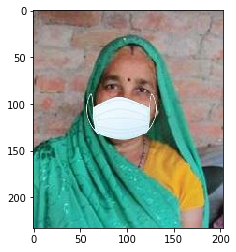

In [8]:
rand_int = randint(0, len(image_test))
plt.imshow(image_test[rand_int][:,:,::-1])
if y_test[rand_int] == 1:
    print('With Mask')
else:
    print('Without Mask')

### Transform image to LBP code

In [9]:
data = []
for image in images:
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    hist = lbp.histogram(gray)
    data.append(hist)

In [10]:
x_train = data[:int(0.8*data_size)]

In [11]:
x_test = data[int(0.8*data_size):]

### Use Support Vector Machine and Train the model

In [12]:
model = LinearSVC(C=100000.0, random_state=42, max_iter = 100000)
model.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=100000.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=100000,
          multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
          verbose=0)

### Evaluate model

In [37]:
score = model.score(x_train, y_train)
test_score = model.score(x_test,y_test)
score

0.7118181818181818

### Test model

With Mask


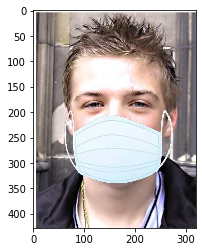

In [33]:
rand_int = randint(0, 552)
prediction = model.predict(x_test[rand_int].reshape(1, -1))
if prediction == 1:
    print('With Mask')
else:
    print('Without Mask')
plt.imshow(image_test[rand_int][:,:,::-1])

In [34]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import svm

modelrbf = svm.SVC(kernel='rbf')
modelrbf.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [35]:
scorerbf = modelrbf.score(x_train, y_train)
test_scorerbf = modelrbf.score(x_test,y_test)
test_scorerbf

0.5543478260869565